In [296]:
from scipy.stats import beta
from pymc import rbeta

In [194]:
class Sample(object):
    def __init__(self, q, n=1000000):
        self.q = q
        self.n = n
        self.G = int(np.ceil(q*n))
        self.B = n - self.G
        
    def generate(self, from_file = None, seed=2016):
        self.seed = seed
        
        if from_file:
            name = "./samples/{}_{}.txt".format(str(self.q).replace(".",""),str(self.seed))
            self.line = np.loadtxt(name, dtype=np.int8)
            
        seed = np.random.seed(seed)
        line = np.append(np.ones(self.G, dtype = np.int8), np.zeros(self.B, dtype = np.int8))
        self.line = np.random.permutation(line)
        return self.line
    
    def save(self):
        name = "./samples/{}_{}.txt".format(str(self.q).replace(".",""),str(self.seed))
        np.savetxt(name, self.line,fmt="%d")

In [359]:
class Strategy(object):
    '''Gets a sample object and builds a test plan'''
    def __init__(self, sample, startig_test=1):
        self.q = beta(1,1)
        self.sample = sample
        self.queue = sample.line
        self.Ntests = 0
        self.Htests = 0
        self.test_now = startig_test
        self.G = 0
        self.B = 0
        self.q_history = []
        self.H_history = []
        
    def test(self):
        '''test need to be implemented according to the relevant strategy'''
        pass
    
    def g_test(self, items):
        if items.size == 1:
            return
        self.Ntests += 1
        m = int(items.size/2)
        test, leave = np.split(items, [m])
        if all(test):
            self.G += test.size
            self.g_test(leave)
        else:
            # Leave is now binomial and back to queue
            self.queue = np.append(leave, self.queue)
            self.g_test(test)
    
#     def update(self):
#         '''updates all histories'''
        
    def plot(self):
        fig, ax = plt.subplots(2,figsize=(16,12))
        ax[0].plot(self.q_history)
        ax[0].set_title("q History")
        ax[1].plot(self.H_history)
        ax[1].set_title("H History")
        ax[1].set_xlim(0,len(self.H_history))
        
class DOD(Strategy):
    def test(self):
        h_now = self.test_now
        while self.queue.size > 0:
            # Update histories
            self.Ntests += 1
            self.Htests += 1
            self.H_history.append(h_now)
            self.q_history.append(self.G / ( 1+ self.G + self.B))
            
            items, self.queue = np.split(self.queue,[h_now])
            if all(items):
                self.G += items.size
                h_now *= 2
            else:
                self.B +=1
                self.g_test(items)
                h_now = max(1, h_now//2)
            


0
6100 3900
6100 3900
10901


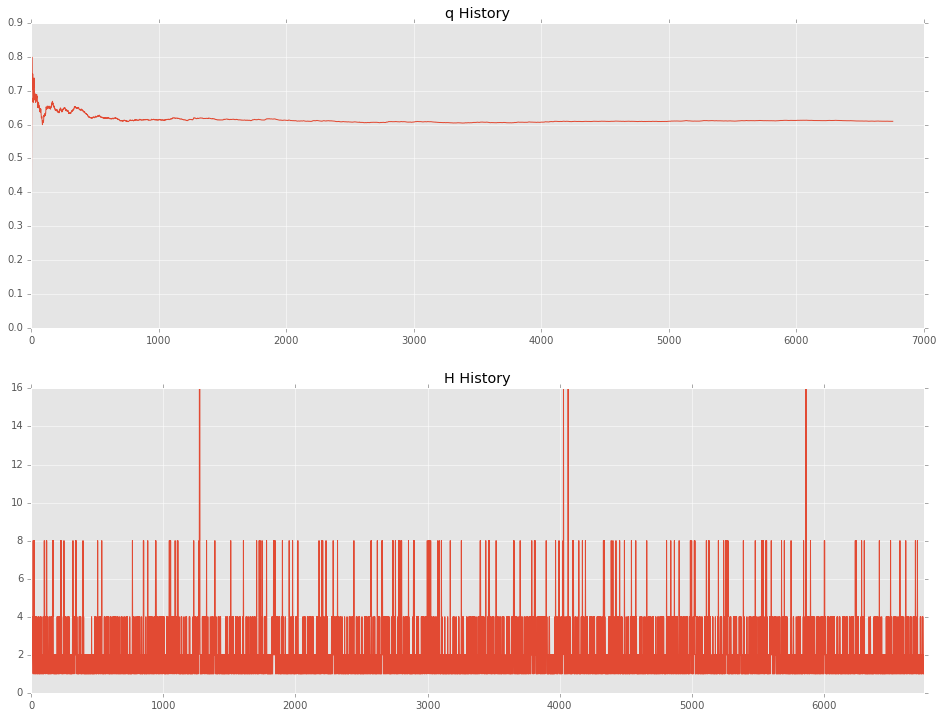

In [360]:
s = Sample(0.61, n=10000)
s.generate()
d = DOD(s,)

d.test()

print(d.queue.size)
print(s.G, s.B)
print(d.G, d.B)
print(d.Ntests)
d.plot()
plt.show()

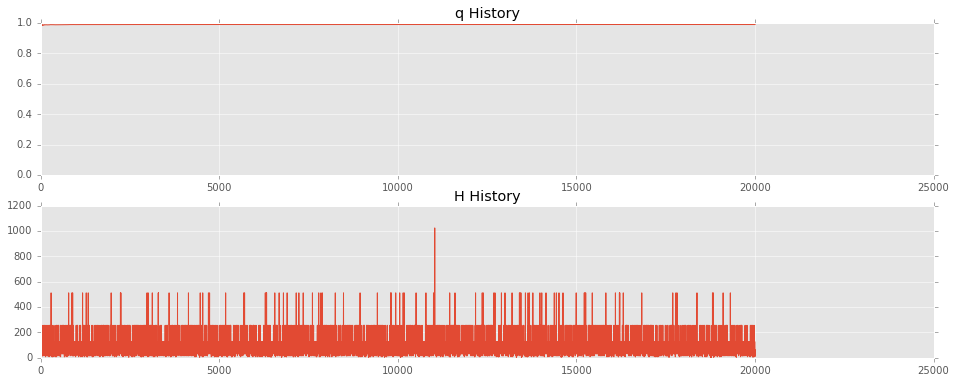

In [344]:
d.plot()